In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

### Load the list of samples to be considered

In [73]:
select_sampels = pd.read_csv('./selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
#select_sampels.drop("Participant ID", inplace=True, axis=1)
select_sampels

,Participant ID,fecalcal_max,Diagnosis
External ID,,,
CSM67UA2,C3001,37.17836,CD
CSM5MCVN,C3002,16.32450,CD
CSM67UBZ,C3003,14.30000,UC
CSM5MCXL,C3004,70.91411,UC
CSM5MCY8,C3005,232.60620,UC
...,...,...,...
PSM7J19N,P6017,16.78459,nonIBD
PSM6XBW3,P6018,79.82248,nonIBD
PSM7J12J,P6024,289.22620,CD


### ESCO prediction testing

In [74]:
mp = pd.read_csv('ESCO_all_pheno_MGX.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Absiella_sp000165065:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_983,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_990,s__esco_HumanRef_tmp_v1.0.1_998,s__esco_HumanRef_tmp_v1.0.1_999,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5MCVL,0.023,0.000,0.000,0.002,0.000,0.001,0.000,0.002,0.001,0.145,...,0.000,0.000,0.000,0.003,0.000,0.001,0.000,0.002,0.0,CD
CSM5MCVN,0.018,0.000,0.001,0.002,0.000,0.000,0.000,0.002,0.001,3.072,...,0.000,0.000,0.000,0.002,0.000,0.001,0.000,0.002,0.0,CD
CSM5MCW6,0.034,0.000,0.010,0.006,0.000,0.001,0.001,0.003,0.004,0.001,...,0.001,0.001,0.002,0.005,0.000,0.000,0.000,0.000,0.0,CD
CSM5MCWC,0.026,0.004,0.454,0.004,0.012,0.019,0.000,0.130,0.040,0.000,...,0.000,0.000,0.003,0.000,0.000,0.019,0.000,0.000,0.0,CD
CSM5MCWE,0.000,0.002,0.304,0.002,0.008,0.021,0.000,0.057,0.018,0.000,...,0.001,0.000,0.002,0.000,0.000,0.015,0.001,0.000,0.0,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSMA265D,0.006,0.005,0.048,0.031,0.003,0.018,0.000,0.025,0.038,0.001,...,0.000,0.000,0.006,0.000,0.001,0.007,0.003,0.000,0.0,Control
PSMA265F,0.012,0.005,0.073,0.561,0.003,0.005,0.000,0.037,0.022,0.000,...,0.000,0.000,0.010,0.000,0.002,0.012,0.005,0.000,0.0,Control
PSMA265H,0.006,0.018,0.094,0.573,0.002,0.010,0.001,0.024,0.025,0.001,...,0.000,0.000,0.006,0.000,0.001,0.010,0.003,0.000,0.0,Control


In [75]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Absiella_sp000165065:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_983,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_990,s__esco_HumanRef_tmp_v1.0.1_998,s__esco_HumanRef_tmp_v1.0.1_999,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,0.019,0.001,0.002,0.012,0.000,0.012,0.000,0.002,0.003,0.000,...,0.000,0.000,0.002,0.002,0.000,0.000,0.000,0.002,0.00000,CD
CSM5MCVN,0.018,0.000,0.001,0.002,0.000,0.000,0.000,0.002,0.001,3.072,...,0.000,0.000,0.000,0.002,0.000,0.001,0.000,0.002,0.00000,CD
CSM67UBZ,0.030,0.001,0.003,0.023,0.001,0.001,0.000,0.015,0.002,0.383,...,0.000,0.001,0.000,0.002,0.001,0.003,0.001,0.000,0.00001,UC
CSM5MCXL,0.068,0.002,0.002,0.001,0.001,0.001,0.003,0.002,0.004,0.001,...,0.000,0.000,0.001,0.002,0.000,0.001,0.000,0.002,0.00000,UC
CSM5MCY8,0.044,0.001,0.004,0.022,0.000,0.002,0.000,0.003,0.024,0.009,...,0.000,0.010,0.002,0.003,0.000,0.027,0.003,0.001,0.00002,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,0.007,0.001,0.002,0.007,0.001,0.044,0.054,0.469,0.803,0.003,...,0.000,0.001,0.002,0.001,0.000,0.001,0.001,0.001,0.00001,nonIBD
PSM6XBW3,0.001,0.001,4.173,0.006,0.041,0.001,0.000,0.000,0.002,0.006,...,0.002,0.001,0.012,0.000,0.001,0.029,0.001,0.000,0.00001,nonIBD
PSM7J12J,0.004,0.000,0.104,0.000,0.005,0.001,0.000,0.000,0.001,0.000,...,0.000,0.000,0.000,0.002,0.000,0.001,0.000,0.000,0.00000,CD


In [76]:
MTX_X = mp.iloc[:,0:-1]
MTX_y = mp.iloc[:,-1]

min_nonzero = min(MTX_y.value_counts())
abundance_threshold = 0.01
                  
species_above_threshold = MTX_X.apply(lambda x: sum(x>abundance_threshold), axis=0)>=min_nonzero
print(f"{sum(species_above_threshold)} species are above the threshold")
MTX_X = MTX_X.loc[:,species_above_threshold]

#fill NA's
#MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)
#MTX_X.apply(mean)
print(f"After scaling: mean={MTX_X.mean()}, sd={MTX_X.std()}")

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.40, random_state=42)

323 species are above the threshold
After scaling: mean=1.6730579355759754e-18, sd=1.0


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=150).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest accuracy: {metrics.accuracy_score(y_test,rf_pred)}")
print(confusion_matrix(y_test, rf_pred))

Random Forest accuracy: 0.38235294117647056
[[11  1  2]
 [ 7  0  4]
 [ 6  1  2]]


### MetaPhlan4-based prediction

In [78]:
mp4 = pd.read_csv('Metaphlan4_all_pheno.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp4 = mp4.set_index('External ID')
mp4 = mp4.loc[select_sampels.index,:]
mp4 = mp4.loc[:,mp4.columns.str.startswith('s__')]
mp4["diagnosis"] = select_sampels.iloc[:,-1]
mp4

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB3632_SGB4921,s__GGB4710_SGB6522,s__GGB4706_SGB6513,s__GGB3643_SGB4948,s__Sanguibacteroides_SGB1777,s__GGB3632_SGB4920,s__Lachnospiraceae_bacterium_NSJ_46,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,1.45700,1.91898,1.34449,0.03810,0.90627,19.83516,0.28439,17.15467,0.03724,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM5MCVN,51.31297,0.95498,1.54371,0.04588,0.18414,1.99150,7.95270,0.01466,18.67487,0.34879,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM67UBZ,0.00313,1.29919,1.03434,2.82078,0.00694,10.84042,1.39625,0.00558,16.65207,1.02143,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCXL,32.29455,3.46622,2.09791,9.10884,0.71850,2.63304,0.00904,0.55343,12.83634,0.12034,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCY8,40.22876,0.56787,0.15291,0.04742,0.30914,2.20589,0.01291,0.15447,8.33000,0.22200,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,5.47393,1.38623,1.06951,0.02240,0.60937,4.65083,2.58785,0.71590,4.14365,0.16762,...,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905,nonIBD
PSM6XBW3,10.50664,0.27922,0.37723,0.32395,0.08358,3.69814,0.32749,0.19103,1.19686,0.13442,...,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905,nonIBD
PSM7J12J,0.00515,1.51739,2.24522,1.38714,0.20735,4.37121,1.14150,0.01921,7.01159,0.22608,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD


In [79]:
mp4_MTX_X = mp4.iloc[:,0:-1]
mp4_MTX_y = mp4.iloc[:,-1]

# As before
# min_nonzero = 42 # min(MTX_y.value_counts())
# abundance_threshold = 0.01
                  
mp4_species_above_threshold = mp4_MTX_X.apply(lambda x: sum(x>abundance_threshold), axis=0)>=min_nonzero
#print(mp4_species_above_threshold)
print(f"{sum(species_above_threshold)} species are above the threshold")
mp4_MTX_X = mp4_MTX_X.loc[:,mp4_species_above_threshold]

#fill NA's
#MTX_X.fillna(MTX_X.median(), inplace=True)
mp4_MTX_X = StandardScaler().fit_transform(mp4_MTX_X)
#MTX_X.apply(mean)
print(f"After scaling: mean={mp4_MTX_X.mean()}, sd={mp4_MTX_X.std()}")

#from sklearn.model_selection import train_test_split
mp4_X_train, mp4_X_test, mp4_y_train, mp4_y_test = train_test_split(mp4_MTX_X, mp4_MTX_y, test_size=0.40, random_state=42)

323 species are above the threshold
After scaling: mean=-4.9451335890569225e-18, sd=1.0


In [80]:
mp4_rf = RandomForestClassifier(n_estimators=150).fit(mp4_X_train, mp4_y_train)
mp4_rf_pred = mp4_rf.predict(mp4_X_test)
print(f"Random Forest accuracy: {metrics.accuracy_score(mp4_y_test, mp4_rf_pred)}")
print(confusion_matrix(mp4_y_test, mp4_rf_pred))

Random Forest accuracy: 1.0
[[14  0  0]
 [ 0 11  0]
 [ 0  0  9]]


### Other stuff

Best Model:
RandomForestClassifier(max_features=32, min_samples_split=5, random_state=42)


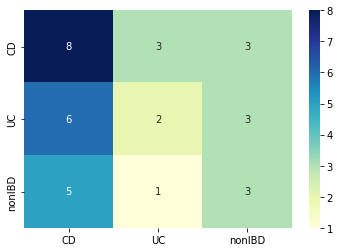

In [81]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=42)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [51]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 38.24%
